<h2>Introduction and Preparation</h2>

__Hult International Business School__ <br>
__Joint Project with SQL - Part II (Team)__ <br>
Team 8: Amber Wang, Darshil P, Pieter Bernardus, Pranay Rajeshwar, Tareq K, Yash Maradia <br>

<br>
Run the following code to import necessary packages, load data, and set display options. 
<br>

__Packages to be install:__ <br>
    + pip install sklearn  <br>
    + pip install statsmodels <br>


__Preface__ :
Introducing the classification model for predicting the wholesalers and the personal customers based on the data.

+ Confusion Matrix from model - part1: <br>
   [[161      6] <br>
   [ 25      8]]

+ The model had a biased recommendations for the predicting the type of the customers for the business - "Flora" which they   were ready to begin their new journey in the start of new venture strategy. Such type of model from the part-1 using the   supervised learning model of ML predicts as ~90% customers as the wholesalers compared to that of personal customers.

+ This type of the predictions will end up in the various problems for the company where they are trying to invest in the     new ventures. with the lack of robustness in the dataset and wrong predictions leads to the heavy investment in the wrong   campaigns and new innovations of technology which involves heavy investments.

+ No proper planning nor using the correctness of the data analysis leads to various disaster situations which end up in     doing lots of disaster recovery with correctness and involving the cost.

+ Further exhibihilating the SQL database of H_Retail to get righteous variables to calculate the actual things to perform   the robust recommendations to the management to take the right path of business development and growth trends of the company.

+ Through the optimizing code from SQL we fetched the data required for the classification model for the improvements.

### Coding Begins.!!

In [1]:
## importing all the necessary libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.formula.api as smf
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # For numpy arrays
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.model_selection import train_test_split # train/test split
from sklearn.naive_bayes import GaussianNB #navy bayes model
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.neighbors import KNeighborsClassifier # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.metrics import classification_report #classification report essentials
from sklearn.metrics import confusion_matrix # confusion matrix essentials
from sklearn.metrics import accuracy_score # accuracy score essentials
# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## saving the filepath to file
file = './Model_Joined_part2_ML_SQL.csv'
#pca_3 = PCA(n_components = 3,
            #random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
#customer_pca_3 = pca_3.fit_transform(df_scaled)


# calling the scree_plot function
#scree_plot(pca_object = pca_3,
           #export     = False)
## loading and printing the first 5 rows of the model to check them
model_df = pd.read_csv(filepath_or_buffer = file)
print(model_df.shape)
model_df.head(n=10)

(1021, 19)


,customer_id,sex,age,occupation,employment_type,education,country_code,completed_years_of_education,marital_status,relationship_in_household,race,times_bought,N1_times_bought,N2_times_bought,quantity_bought,N1_quantity_bought,N2_quantity_bought,money_spent,type_of_client
0,1504001,M,44,Other-occupations,Other-employments,High Education,US,13,Married-civ-spouse,Husband,White,53.0,0,0,127.0,0,1,274.66,1
1,3928504,M,21,Other-occupations,Other-employments,Some-college,US,10,Never-married,Not-in-family,White,31.0,0,0,113.0,0,1,388.40,1
2,5997529,F,19,Other-occupations,Other-employments,Low Education,US,7,Never-married,Other-relative,White,7.0,1,0,19.0,1,0,110.18,0
3,14044670,F,32,Other-occupations,Other-employments,High Education,US,13,Never-married,Not-in-family,White,166.0,0,0,598.0,0,0,1408.16,1
4,16835953,M,54,Other-occupations,Other-employments,High Education,US,9,Married-civ-spouse,Husband,White,96.0,0,0,403.0,0,0,700.75,1
5,19383612,M,60,Prof-specialty,Other-employments,High Education,US,13,Married-civ-spouse,Husband,White,3.0,1,0,3.0,1,0,-34.05,1
6,21318515,M,36,Other-occupations,Other-employments,Some-college,Non_US,10,Married-civ-spouse,Husband,Other,287.0,0,0,779.0,0,0,1857.97,1
7,23055398,F,50,Other-occupations,Federal-gov,High Education,US,14,Never-married,Not-in-family,White,85.0,0,0,252.0,0,0,723.33,0
8,25613243,F,45,Other-occupations,Other-employments,High Education,US,9,Other,Not-in-family,White,14.0,1,0,56.0,1,0,199.38,0
9,25794505,M,32,Craft-repair,Other-employments,Some-college,US,10,Other,Not-in-family,White,NaN,0,0,NaN,0,0,NaN,1


In [2]:
# Print number of missing values in banking
print(model_df.isna().sum(axis=0))

plt.show()

customer_id                      0
sex                              0
age                              0
occupation                       0
employment_type                  0
education                        0
country_code                     0
completed_years_of_education     0
marital_status                   0
relationship_in_household        0
race                             0
times_bought                    51
N1_times_bought                  0
N2_times_bought                  0
quantity_bought                 51
N1_quantity_bought               0
N2_quantity_bought               0
money_spent                     51
type_of_client                   0
dtype: int64


In [3]:
## creating a variable to replace the empty values with the median
empty_col = {'times_bought':model_df.times_bought.median() ,'quantity_bought':model_df.quantity_bought.median(), 
             'money_spent':model_df.money_spent.median()}

## using a for loop to loop over the data frame to replace empty values
for keys, values in empty_col.items(): 
    model_df[keys] = model_df[keys].fillna(value = values)

## using print to see if there are any NA's
print(model_df.isna().sum(axis=0))

customer_id                     0
sex                             0
age                             0
occupation                      0
employment_type                 0
education                       0
country_code                    0
completed_years_of_education    0
marital_status                  0
relationship_in_household       0
race                            0
times_bought                    0
N1_times_bought                 0
N2_times_bought                 0
quantity_bought                 0
N1_quantity_bought              0
N2_quantity_bought              0
money_spent                     0
type_of_client                  0
dtype: int64


In [4]:
# checking the info of the dataset
model_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   1021 non-null   int64  
 1   sex                           1021 non-null   object 
 2   age                           1021 non-null   int64  
 3   occupation                    1021 non-null   object 
 4   employment_type               1021 non-null   object 
 5   education                     1021 non-null   object 
 6   country_code                  1021 non-null   object 
 7   completed_years_of_education  1021 non-null   int64  
 8   marital_status                1021 non-null   object 
 9   relationship_in_household     1021 non-null   object 
 10  race                          1021 non-null   object 
 11  times_bought                  1021 non-null   float64
 12  N1_times_bought               1021 non-null   int64  
 13  N2_

In [5]:
################ Model ################

# selecting the categorical variables sex, occupation, country_code, marital_status and race
features = ['sex','occupation','education','employment_type','country_code','marital_status','race','relationship_in_household']
model_df_dm = pd.DataFrame()
## creating new dataframe using only features of interest 
model_df_dm = model_df.loc[:,features]
model_df_dm['age'] = model_df['age']
model_df_dm['completed_years_of_education'] = model_df['completed_years_of_education']
model_df_dm['times_bought'] = model_df['times_bought']
model_df_dm['N1_times_bought'] = model_df['N1_times_bought']

model_df_dm['quantity_bought'] = model_df['quantity_bought']
model_df_dm['N1_quantity_bought'] = model_df['N1_quantity_bought']
model_df_dm['N2_quantity_bought'] = model_df['N2_quantity_bought']

model_df_dm['money_spent'] = model_df['money_spent']
model_df_dm['type_of_client'] = model_df['type_of_client']

## creating dummie variables for sex, occupation, country_code, marital_status and race
model_df_dm = pd.get_dummies(model_df_dm, columns = features)
model_df_dm.shape

(1021, 35)

In [6]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [7]:
model_df_2 =  pd.DataFrame()
columns_2 = ['age','sex_F',
'race_White','employment_type_Self-emp-not-inc',
       'marital_status_Married-civ-spouse',
       'relationship_in_household_Husband',
       'relationship_in_household_Unmarried'
       ]
model_df_2 = model_df_dm.loc[:,columns_2]



In [8]:
# scaling (normalizing) variables before correlation analysis
df_scaled = scaler(df = model_df_2)

# checking pre- and post-scaling variance
print(np.var(df_scaled))

age                                    1.0
sex_F                                  1.0
race_White                             1.0
employment_type_Self-emp-not-inc       1.0
marital_status_Married-civ-spouse      1.0
relationship_in_household_Husband      1.0
relationship_in_household_Unmarried    1.0
dtype: float64


### Plot the Correlation matrix

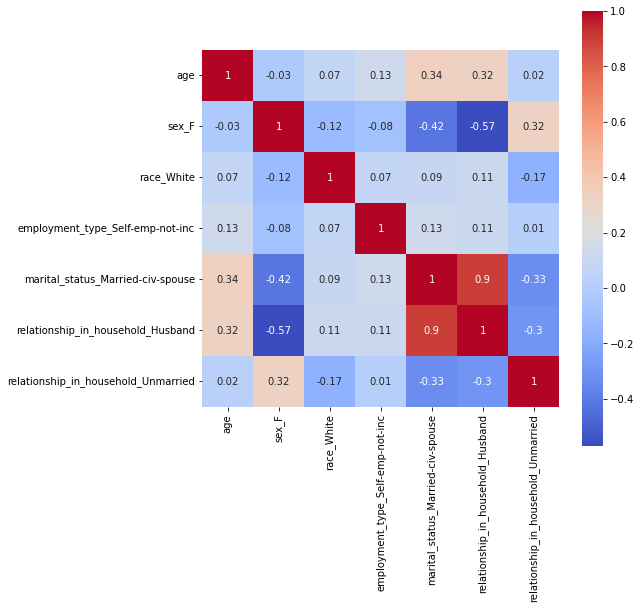

In [9]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = df_scaled.corr(method = 'pearson').round(decimals = 2)


# creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'coolwarm',
            square = True,
            annot  = True)


# rendering the heatmap
plt.show()

### Initialize PCA and K-Means Analysis

In [10]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(df_scaled)

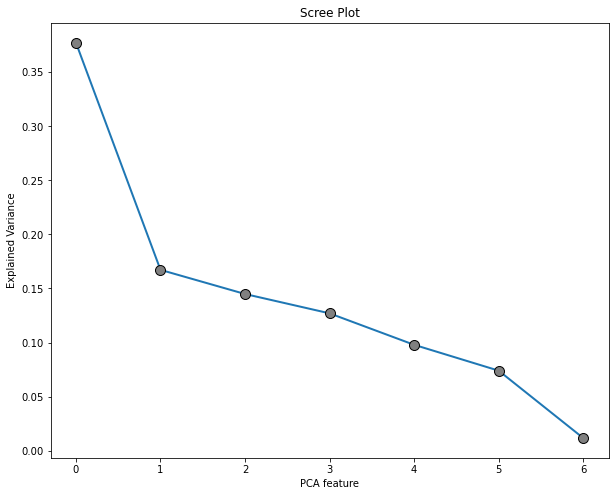

In [11]:
# calling the scree_plot function
scree_plot(pca_object = pca)

In [12]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(df_scaled.columns)


# checking the result
print(factor_loadings_df)


                                        0     1     2     3     4     5     6
age                                 -0.25  0.63  0.01 -0.47 -0.27  0.50  0.00
sex_F                                0.42  0.29  0.06 -0.27 -0.45 -0.66 -0.18
race_White                          -0.15 -0.19  0.82 -0.43  0.27 -0.12  0.02
employment_type_Self-emp-not-inc    -0.13  0.45  0.50  0.72 -0.13 -0.04 -0.02
marital_status_Married-civ-spouse   -0.55  0.11 -0.18 -0.05 -0.01 -0.47  0.66
relationship_in_household_Husband   -0.57  0.06 -0.18 -0.02  0.18 -0.27 -0.73
relationship_in_household_Unmarried  0.31  0.52 -0.12 -0.05  0.78 -0.12  0.07


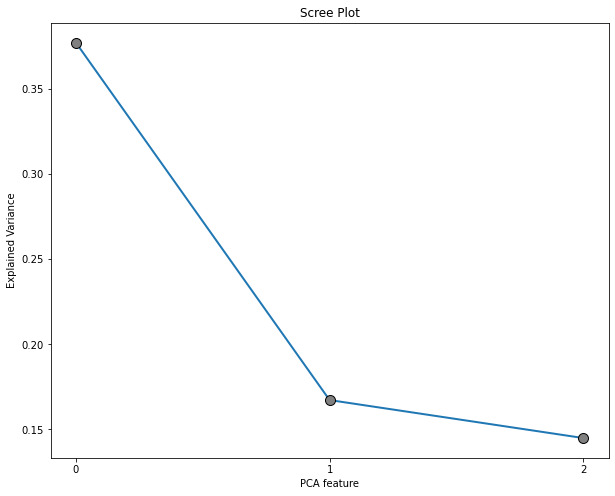

In [13]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_3 = pca_3.fit_transform(df_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_3,
           export     = False)

In [14]:
##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(df_scaled.columns)


# checking the results
print(f"""
3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


3 Components Factor Loadings
------------------------------
                                        0     1     2
age                                 -0.25  0.63  0.01
sex_F                                0.42  0.29  0.06
race_White                          -0.15 -0.19  0.82
employment_type_Self-emp-not-inc    -0.13  0.45  0.50
marital_status_Married-civ-spouse   -0.55  0.11 -0.18
relationship_in_household_Husband   -0.57  0.06 -0.18
relationship_in_household_Unmarried  0.31  0.52 -0.12



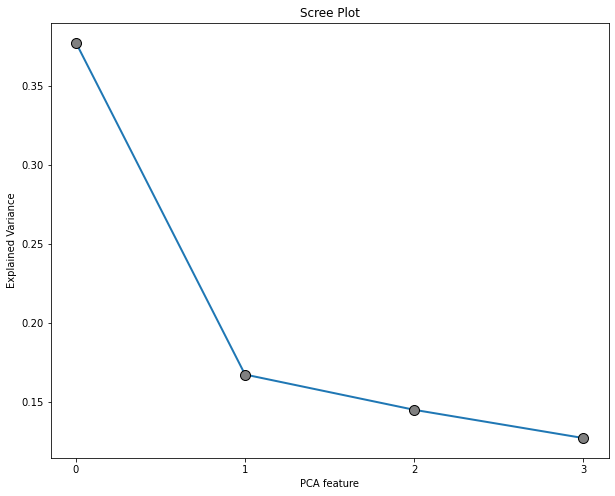

In [15]:
# INSTANTIATING a new model using the first three principal components
pca_4 = PCA(n_components = 4,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_4 = pca_4.fit_transform(df_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_4,
           export     = False)

In [16]:
##################
### 4 PC Model ###
##################
# transposing pca components (pc = 4)
factor_loadings_4 = pd.DataFrame(np.transpose(pca_4.components_))


# naming rows as original features
factor_loadings_4 = factor_loadings_4.set_index(df_scaled.columns)


# checking the results
print(f"""
4 Components Factor Loadings
------------------------------
{factor_loadings_4.round(2)}
""")


4 Components Factor Loadings
------------------------------
                                        0     1     2     3
age                                 -0.25  0.63  0.01 -0.47
sex_F                                0.42  0.29  0.06 -0.27
race_White                          -0.15 -0.19  0.82 -0.43
employment_type_Self-emp-not-inc    -0.13  0.45  0.50  0.72
marital_status_Married-civ-spouse   -0.55  0.11 -0.18 -0.05
relationship_in_household_Husband   -0.57  0.06 -0.18 -0.02
relationship_in_household_Unmarried  0.31  0.52 -0.12 -0.05



In [17]:
# naming each principal component
factor_loadings_3.columns = ['Single_Women',    # Husbands
                             'Old_Unmarried',  # Old People Not Married
                             'White_Self_Emp']  # White People Self Employed


# checking the result
factor_loadings_3.round(decimals = 2)

,Single_Women,Old_Unmarried,White_Self_Emp
age,-0.25,0.63,0.01
sex_F,0.42,0.29,0.06
race_White,-0.15,-0.19,0.82
employment_type_Self-emp-not-inc,-0.13,0.45,0.50
marital_status_Married-civ-spouse,-0.55,0.11,-0.18
relationship_in_household_Husband,-0.57,0.06,-0.18
relationship_in_household_Unmarried,0.31,0.52,-0.12


In [18]:
# naming each principal component
factor_loadings_4.columns = ['Single_Women',    # Husbands
                             'Old_Unmarried',  # Old People Not Married
                             'White_Self_Emp',
                             'Non_white_self_Emp']  # White People Self Employed


# checking the result
factor_loadings_4.round(decimals = 2)

,Single_Women,Old_Unmarried,White_Self_Emp,Non_white_self_Emp
age,-0.25,0.63,0.01,-0.47
sex_F,0.42,0.29,0.06,-0.27
race_White,-0.15,-0.19,0.82,-0.43
employment_type_Self-emp-not-inc,-0.13,0.45,0.50,0.72
marital_status_Married-civ-spouse,-0.55,0.11,-0.18,-0.05
relationship_in_household_Husband,-0.57,0.06,-0.18,-0.02
relationship_in_household_Unmarried,0.31,0.52,-0.12,-0.05


In [19]:
# converting customer-level data into DataFrame
customer_pca_3 = pd.DataFrame(customer_pca_3)


# renaming customer-level data
customer_pca_3.columns = factor_loadings_3.columns


# checking factor loadings per customer
customer_pca_3.head(n = 5)

,Single_Women,Old_Unmarried,White_Self_Emp
0,-1.787655,-0.150487,-0.181772
1,0.899882,-1.583887,0.511961
2,1.843097,-1.054697,0.636926
3,1.603525,-0.442064,0.649744
4,-1.971941,0.320769,-0.171912


In [20]:
# applying the unsupervised_scaler function
pca_scaled = scaler(df = customer_pca_3)


# checking pre- and post-scaling variance
print(np.var(customer_pca_3), '\n\n')
print(np.var(pca_scaled))

Single_Women      2.640946
Old_Unmarried     1.170489
White_Self_Emp    1.014180
dtype: float64 


Single_Women      1.0
Old_Unmarried     1.0
White_Self_Emp    1.0
dtype: float64


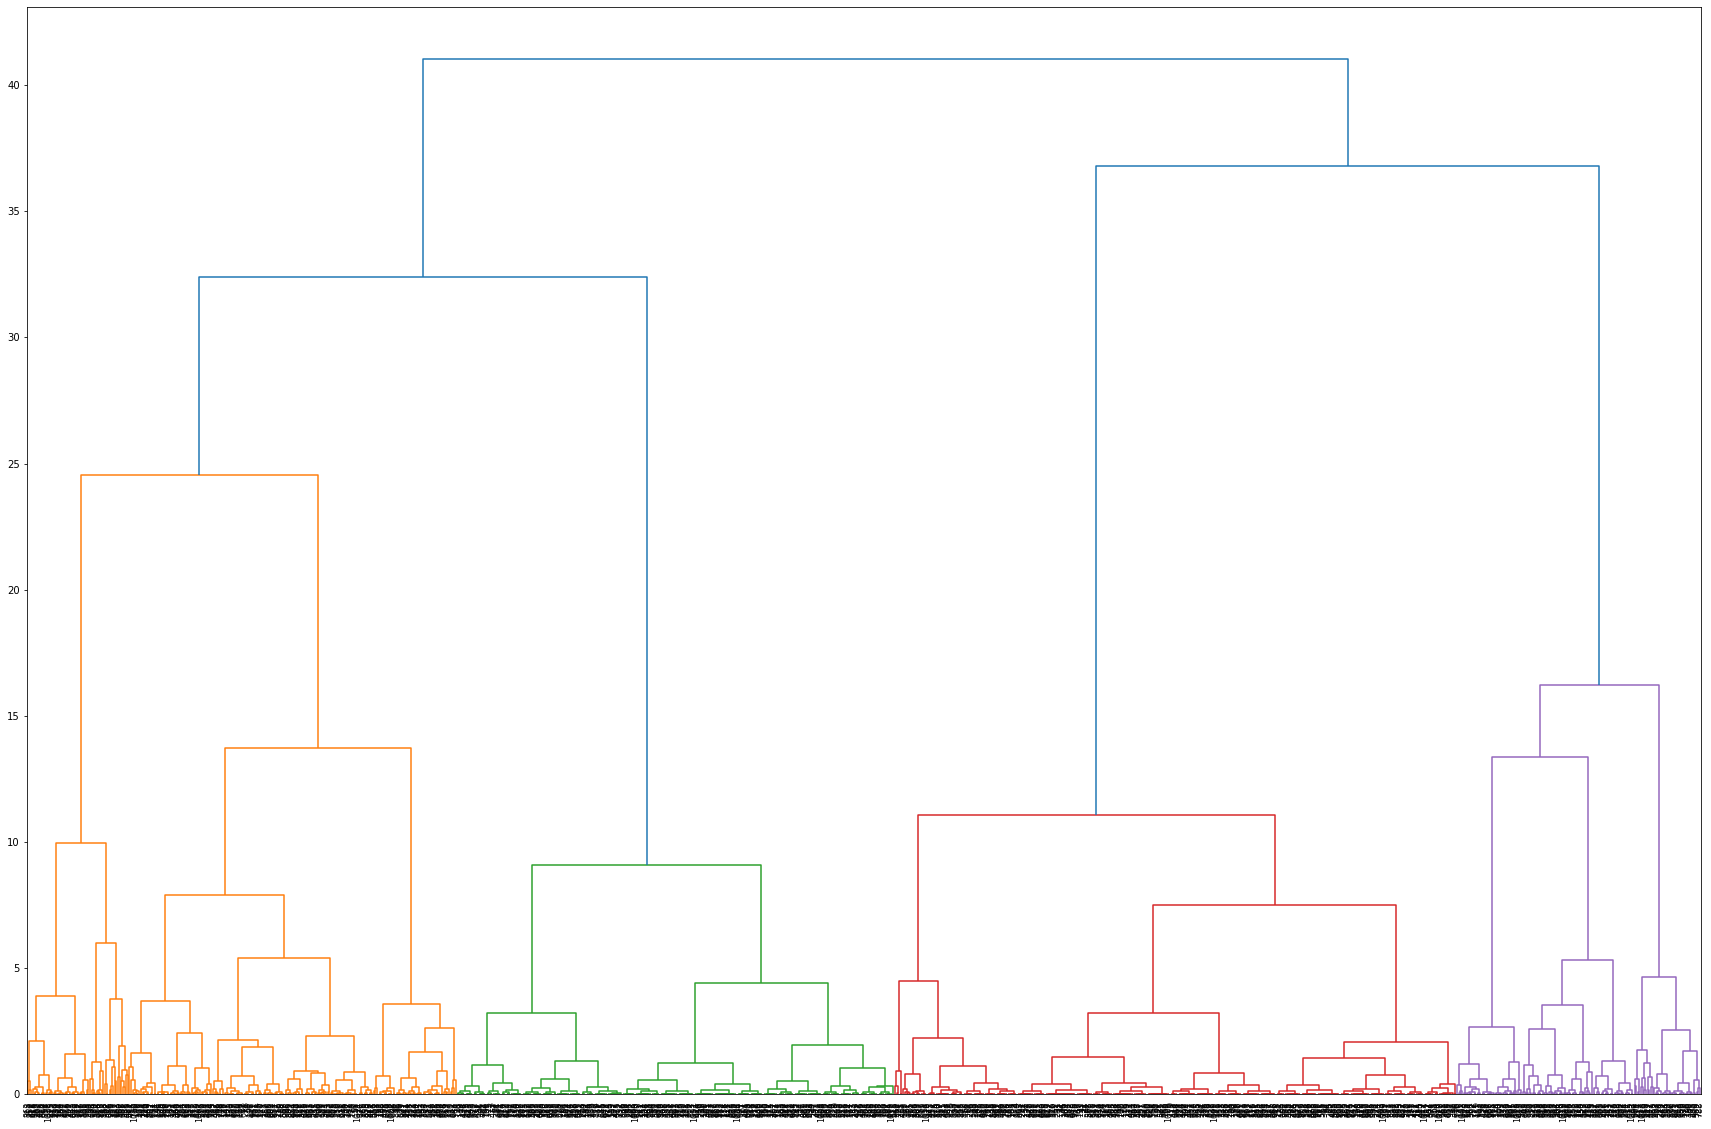

In [21]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(30, 20))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 8)


# rendering the plot
plt.show()

### Dendrogram Analysis

+ There are 4 well distributed clusters from the colors shown in the graph. From these, the red cluster is the one with the smallest difference, which means that between the 4 clusters that we can clearly see from the color distinction, the red one is the one more similar among itself, followed by the green, purple, and orange, in that order.

+ One of the disadvantage of dendrograms is that they do not specify how many clusters you should have or take. It usually gives a good representation of the colors, but it is not an exact thing. Normally you have enough independence when choosing the number of clusters and it will depend on the conclusions you want to extract and the questions you may want to solve.

+ This is a special case, as we can see, the combination of clusters between orange and green, with the one coming from red and purple is pretty much at the same level, making it hard to have 3 clusters. This means that we should decide between 2 or 4. Since the 4 clusters are quite balanced in terms of sample size, having at least a 16% of the total each of them, that is why we thought of picking 4 clusters for this specific example.





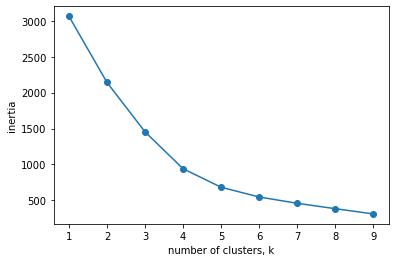

In [22]:
import warnings
warnings.filterwarnings('ignore')
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(np.array(pca_scaled))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [23]:
# Create KMeans instance: kmeans
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters,random_state = 219)

# Label original data using 3 clusters
labels = kmeans.fit_predict(pca_scaled)


In [24]:
#Create dataframe using the original dataframe and new labeled column
final = pd.concat([pca_scaled, pd.DataFrame(labels)],axis=1)
final = final.rename(columns={0:"model_category"})

# checking the first 5 rows
final.model_category.value_counts(normalize=True)

0    0.341822
1    0.333007
3    0.179236
2    0.145935
Name: model_category, dtype: float64

In [25]:
# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    349
1    340
3    183
2    149
Name: Cluster, dtype: int64


In [26]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Single_Women',    # Husbands
                             'Old_Unmarried',  # Old People Not Married
                             'White_Self_Emp']  # White People Self Employed

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(decimals = 2)

,Single_Women,Old_Unmarried,White_Self_Emp
0,0.65,-0.79,0.54
1,-1.10,-0.13,-0.18
2,0.60,0.43,-2.00
3,0.31,1.41,0.94


In [27]:
final['type_of_client'] = model_df['type_of_client']
final['money_spent'] = model_df['money_spent']
final['quantity_bought'] = model_df['quantity_bought']

# renaming channels
final_names = {1 : 'Wholesalers',
               0 : 'Personal Customers'}


final['type_of_client'].replace(final_names, inplace = True)

In [28]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\
 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
{round(len(final.loc[ : , "model_category"][final.loc[ : , "model_category"] == 0]) /
       len(final), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 0 , :].to_string(dtype = False, name = False)}


type_of_client
---------------
{final.loc[ : , "type_of_client"][ final.loc[ : , 'model_category' ] == 0]

         .value_counts(normalize = True)

         .sort_index().to_string(dtype = False, name = False)}

Money_Spent & Quantity_bought
------------------------------
Money_Spent {final.loc[ : , "money_spent"][ final.loc[ : , 'model_category' ] == 0].mean()

}
Quantity_bought {final.loc[ : , "quantity_bought"][ final.loc[ : , 'model_category' ] == 0].mean()

}
      
Ratio Money_Spent/Amount
-------------------------
{(final.loc[ : , "money_spent"][ final.loc[ : , 'model_category' ] == 0].mean()
          / final.loc[ : , "quantity_bought"][ final.loc[ : , 'model_category' ] == 0].mean()
 )
}
      
""")

 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
0.34


Centroids
---------
Single_Women      0.653847
Old_Unmarried    -0.793646
White_Self_Emp    0.539574


type_of_client
---------------
Personal Customers    0.166189
Wholesalers           0.833811

Money_Spent & Quantity_bought
------------------------------
Money_Spent 1456.684555873925
Quantity_bought 670.2722063037249
      
Ratio Money_Spent/Amount
-------------------------
2.1732731003526764
      



In [29]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\
 -----------
| Cluster 2 |
 -----------

Proportion of Observations
--------------------------
{round(len(final.loc[ : , "model_category"][final.loc[ : , "model_category"] == 1]) /
       len(final), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 1 , :].to_string(dtype = False, name = False)}


type_of_client
---------------
{final.loc[ : , "type_of_client"][ final.loc[ : , 'model_category' ] == 1]

         .value_counts(normalize = True)

         .sort_index().to_string(dtype = False, name = False)}
      
Money_Spent & Quantity_bought
------------------------------
Money_Spent {final.loc[ : , "money_spent"][ final.loc[ : , 'model_category' ] == 1].mean()

}
Quantity_bought {final.loc[ : , "quantity_bought"][ final.loc[ : , 'model_category' ] == 1].mean()

}
      
Ratio Money_Spent/Amount
------------------------------
{(final.loc[ : , "money_spent"][ final.loc[ : , 'model_category' ] == 1].mean()
          / final.loc[ : , "quantity_bought"][ final.loc[ : , 'model_category' ] == 1].mean()
 )
}
      
""")

 -----------
| Cluster 2 |
 -----------

Proportion of Observations
--------------------------
0.33


Centroids
---------
Single_Women     -1.101329
Old_Unmarried    -0.134100
White_Self_Emp   -0.180385


type_of_client
---------------
Personal Customers    0.176471
Wholesalers           0.823529
      
Money_Spent & Quantity_bought
------------------------------
Money_Spent 1125.751779411765
Quantity_bought 648.5823529411765
      
Ratio Money_Spent/Amount
------------------------------
1.7357113931742538
      



In [30]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\
 -----------
| Cluster 3 |
 -----------

Proportion of Observations
--------------------------
{round(len(final.loc[ : , "model_category"][final.loc[ : , "model_category"] == 2]) /
       len(final), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 2 , :].to_string(dtype = False, name = False)}


type_of_client
---------------
{final.loc[ : , "type_of_client"][ final.loc[ : , 'model_category' ] == 2]

         .value_counts(normalize = True)

         .sort_index().to_string(dtype = False, name = False)}
      
Money_Spent & Quantity_bought
------------------------------
Money_Spent {final.loc[ : , "money_spent"][ final.loc[ : , 'model_category' ] == 2].mean()

}
Quantity_bought {final.loc[ : , "quantity_bought"][ final.loc[ : , 'model_category' ] == 2].mean()

}
      
Ratio Money_Spent/Amount
------------------------------
{(final.loc[ : , "money_spent"][ final.loc[ : , 'model_category' ] == 2].mean()
          / final.loc[ : , "quantity_bought"][ final.loc[ : , 'model_category' ] == 2].mean()
 )
}
      
""")

 -----------
| Cluster 3 |
 -----------

Proportion of Observations
--------------------------
0.15


Centroids
---------
Single_Women      0.597938
Old_Unmarried     0.434025
White_Self_Emp   -2.004210


type_of_client
---------------
Personal Customers    0.221477
Wholesalers           0.778523
      
Money_Spent & Quantity_bought
------------------------------
Money_Spent 1788.2407382550334
Quantity_bought 1952.6711409395973
      
Ratio Money_Spent/Amount
------------------------------
0.915792065936181
      



In [31]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\
 -----------
| Cluster 4 |
 -----------

Proportion of Observations
--------------------------
{round(len(final.loc[ : , "model_category"][final.loc[ : , "model_category"] == 3]) /
       len(final), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 2 , :].to_string(dtype = False, name = False)}


type_of_client
---------------
{final.loc[ : , "type_of_client"][ final.loc[ : , 'model_category' ] == 3]

         .value_counts(normalize = True)

         .sort_index().to_string(dtype = False, name = False)}
      
Money_Spent & Quantity_bought
------------------------------
Money_Spent {final.loc[ : , "money_spent"][ final.loc[ : , 'model_category' ] == 3].mean()

}
Quantity_bought {final.loc[ : , "quantity_bought"][ final.loc[ : , 'model_category' ] == 3].mean()

}
      
Ratio Money_Spent/Amount
-------------------------
{(final.loc[ : , "money_spent"][ final.loc[ : , 'model_category' ] == 3].mean()
          / final.loc[ : , "quantity_bought"][ final.loc[ : , 'model_category' ] == 3].mean()
 )

}
      
""")

 -----------
| Cluster 4 |
 -----------

Proportion of Observations
--------------------------
0.18


Centroids
---------
Single_Women      0.597938
Old_Unmarried     0.434025
White_Self_Emp   -2.004210


type_of_client
---------------
Personal Customers    0.15847
Wholesalers           0.84153
      
Money_Spent & Quantity_bought
------------------------------
Money_Spent 1169.6489071038252
Quantity_bought 647.5901639344262
      
Ratio Money_Spent/Amount
-------------------------
1.8061560725345756
      



In [32]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

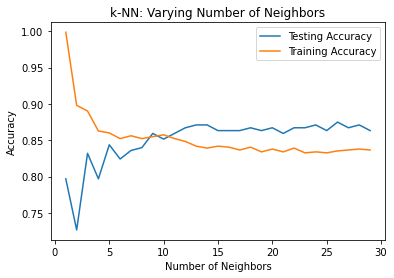

In [33]:
# Create arrays for the features and the response variable
y = np.array(final.loc[:,'type_of_client'])
x = np.array(final.drop('type_of_client', axis=1))
indices = np.arange(len(y))
x_train, x_test, y_train, y_test,x_in,y_in = train_test_split(x, y,indices, test_size = 0.25, 
                                                              random_state=219, stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
# Create a k-NN classifier with 8 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(x_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(x_test)

# Saving the score and gap for the train and test dataset into variables
knn_train_score = knn.score(x_train, y_train).round(decimals=4)
knn_test_score = knn.score(x_test, y_test).round(decimals=4)
knn_gap_score = abs(knn.score(x_train, y_train) - knn.score(x_test, y_test)).round(4)
# Printing the score and gap for the train and test dataset
print("knn Training Score:",knn.score(x_train, y_train).round(decimals=4))
print("knn Testing Score:",knn.score(x_test, y_test).round(decimals=4))
print('Knn Train-Test Gap :', abs(knn.score(x_train, y_train) - knn.score(x_test, y_test)).round(4))

knn Training Score: 0.8549
knn Testing Score: 0.8594
Knn Train-Test Gap : 0.0045


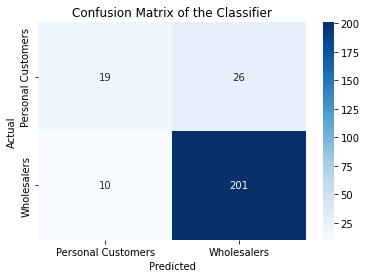

In [35]:
# calling the visual_cm function
y_test_knn = y_test
y_pred_knn = y_pred
visual_cm(true_y = y_test_knn,
          pred_y = y_pred_knn,
          labels = ['Personal Customers', 'Wholesalers'])

In [36]:
## printing the confusion matrix and the classification report 
knn_cm = confusion_matrix(y_test,y_pred)
knn_cr = classification_report(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 19  26]
 [ 10 201]]
                    precision    recall  f1-score   support

Personal Customers       0.66      0.42      0.51        45
       Wholesalers       0.89      0.95      0.92       211

          accuracy                           0.86       256
         macro avg       0.77      0.69      0.72       256
      weighted avg       0.84      0.86      0.85       256



### Confusion Matrix Analysis

As we can see in the confusion matrix, our model helps us predict 85% of the customers successfully. This means that if we get a customer without knowing which one is his/her type, Wholesaler or Regular, we have an 85% chance of predicting them properly, or in other words, 85 out of 100 customers would be predicted as their actual value indicates. 

In this case, out of the 25 regular customers that were predicted, 20 were anticipated perfectly, meanwhile the other 10 were wrongly classified as regular when they were truly wholesalers, which means that the precision for regular customers was 68%. For the prediction of wholesalers, 201 were predicted accordingly, meanwhile the other 28 were mistakenly classified as wholesalers when they were in fact regular customers, which means that the precision for wholesalers was 89%. 


### Prediction Model Analysis

In [37]:
# converting into a DataFrame 
data_pca = pd.DataFrame(customer_pca_3)


# renaming columns
data_pca.columns = factor_loadings_3.columns


# checking results
#survey_pca

In [38]:
customers_kmeans_pca['Cluster'] = customers_kmeans_pca['Cluster'].astype(float)

In [39]:
#Concatenating cluster and compoents
pca_clust_df = pd.concat([customers_kmeans_pca, 
                                data_pca], 
                                axis = 1)

# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([model_df_2.loc[ : , ['age','sex_F',
                                         'race_White','employment_type_Self-emp-not-inc',
                                         'marital_status_Married-civ-spouse',
                                         'relationship_in_household_Husband',
                                         'relationship_in_household_Unmarried'
                                ]],
                                pca_clust_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['age','sex_F',
                                 'race_White','employment_type_Self-emp-not-inc',
                                 'marital_status_Married-civ-spouse',
                                 'relationship_in_household_Husband',
                                 'relationship_in_household_Unmarried',
                                 'Cluster','Single_Women',  
                                 'Old_Unmarried',  
                                 'White_Self_Emp']


# checking the results
#print(final_pca_clust_df.head(n = 5))un

data_df = pd.DataFrame(final_pca_clust_df)
#data_df.head(10)

#data_df.head(10)

In [40]:
data_df

,age,sex_F,race_White,employment_type_Self-emp-not-inc,marital_status_Married-civ-spouse,relationship_in_household_Husband,relationship_in_household_Unmarried,Cluster,Single_Women,Old_Unmarried,White_Self_Emp
0,44,0,1,0,1,1,0,1.0,-1.787655,-0.150487,-0.181772
1,21,0,1,0,0,0,0,0.0,0.899882,-1.583887,0.511961
2,19,1,1,0,0,0,0,0.0,1.843097,-1.054697,0.636926
3,32,1,1,0,0,0,0,0.0,1.603525,-0.442064,0.649744
4,54,0,1,0,1,1,0,1.0,-1.971941,0.320769,-0.171912
...,...,...,...,...,...,...,...,...,...,...,...
1016,65,0,1,0,1,1,0,1.0,-2.174655,0.839152,-0.161066
1017,24,0,1,0,1,1,0,1.0,-1.419083,-1.093001,-0.201493
1018,51,0,1,1,1,1,0,3.0,-2.431849,1.991418,1.855482
1019,21,1,0,0,0,0,0,2.0,2.215427,-0.436803,-1.651881


In [42]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  1021 non-null   int64  
 1   sex_F                                1021 non-null   uint8  
 2   race_White                           1021 non-null   uint8  
 3   employment_type_Self-emp-not-inc     1021 non-null   uint8  
 4   marital_status_Married-civ-spouse    1021 non-null   uint8  
 5   relationship_in_household_Husband    1021 non-null   uint8  
 6   relationship_in_household_Unmarried  1021 non-null   uint8  
 7   Cluster                              1021 non-null   float64
 8   Single_Women                         1021 non-null   float64
 9   Old_Unmarried                        1021 non-null   float64
 10  White_Self_Emp                       1021 non-null   float64
dtypes: float64(4), int64(1), uint8

In [43]:
data_df['Cluster'] = data_df['Cluster'].astype(float)

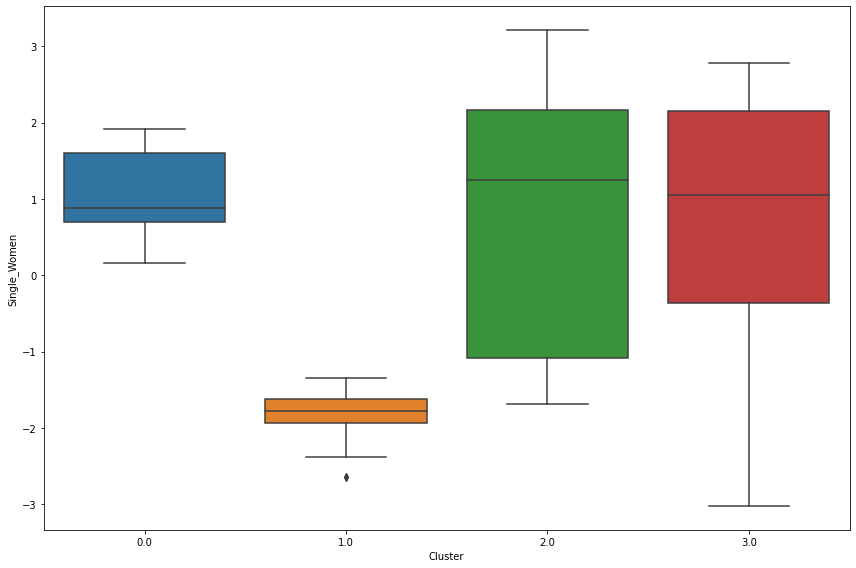

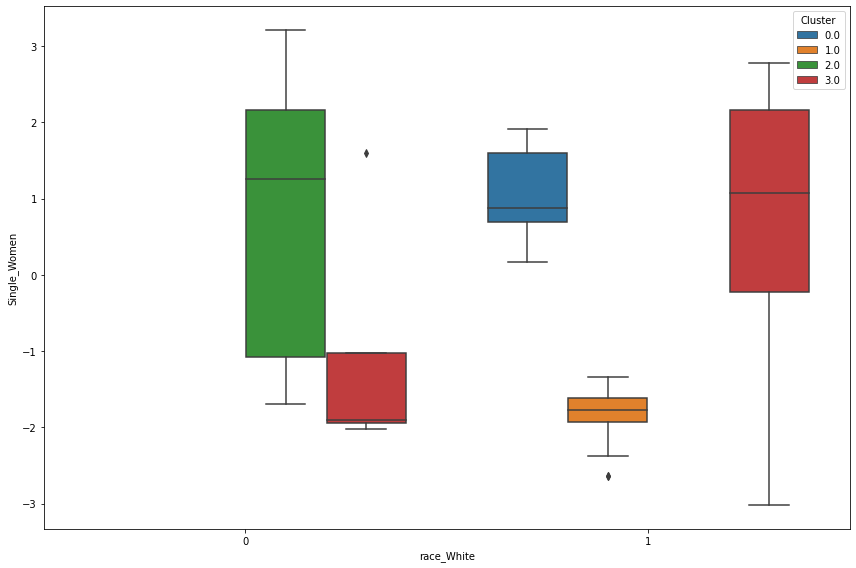

In [44]:
########################
# PCA 1
########################

# Follower 
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Cluster',
            y = 'Single_Women',
#            hue = ' Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

########################
# PCA 1
########################

# Follower 
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'race_White',
            y = 'Single_Women',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

PCA 1 -  the relationship between Clusters and Single_Women. The Box plot shows the cluster 0 is the single women, because all the value in the positive range. And the cluster 1 has no single women due to the the value of single women is -1. The cluster 2 and cluster 3 are not related to the single women because we can't say it's close to the components.  

Red- Single white women are more than the non- white women which is far from the components single women in Cluster 3 is middle age white unmarried entrepreneurs. 

Orange- White men in relationship and non-single women.

Blue- White single women are young and self employed.

Green- Non- white and old unmarried.


Cluster 0 is young single women and self employed.
Cluster 1 is men in relationship.
Cluster 2 is not white and old unmarried.
Cluster 3 is middle age white unmarried entrepreneurs.


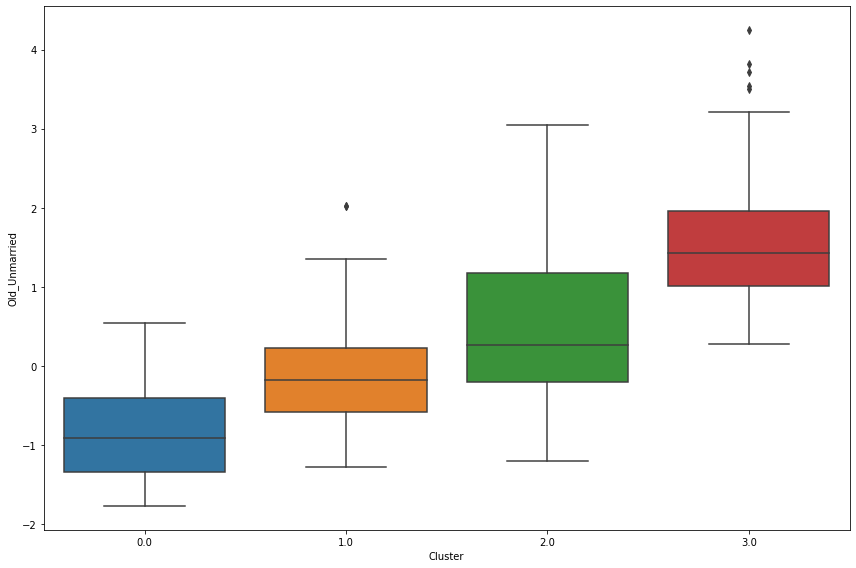

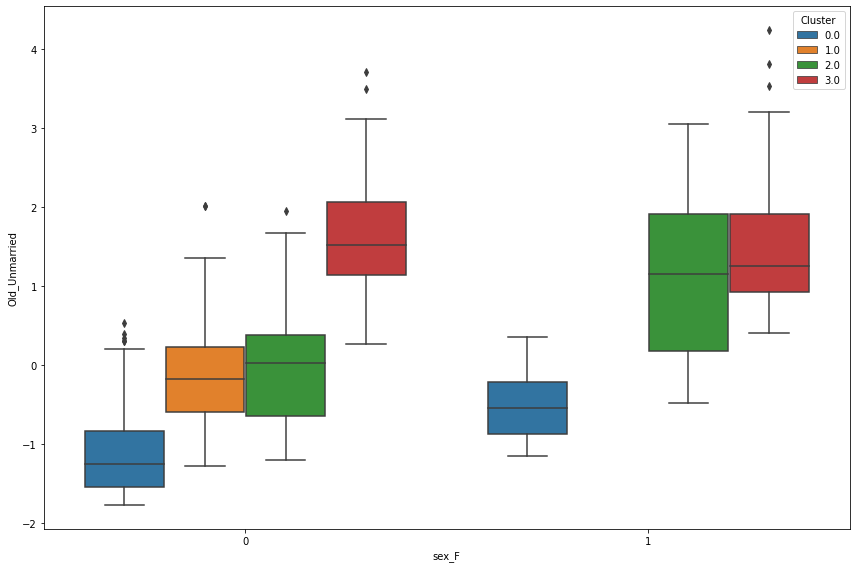

In [45]:
########################
# PCA 2
########################

# Follower 
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Cluster',
            y = 'Old_Unmarried',
#            hue = ' Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

########################
# PCA 2
########################

# Follower 
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'sex_F',
            y = 'Old_Unmarried',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

PCA 2 -  the relationship between Clusters and Old_Unmarried. The Box plot shows the cluster 0 has the negative relationship with the old unmarried people. The cluster 1 is close to neutral because its value close to "0". The cluster 2, is no many relationship with the old unmarried people because its half value negative and half positive. The cluster 3 is related to the old unmarried people because its positive.

Red- old unmarried women and entrepreneurs slightly less than the old unmarried men and entrepreneurs.
Orange- men in relationship.
Blue- young single women and self employed slightly more than men.
Green- is not white and old unmarried women more than men.


Cluster 0 is young single women and self employed.
Cluster 1 is men in relationship.
Cluster 2 is not white and old unmarried.
Cluster 3 is middle age white unmarried entrepreneurs.


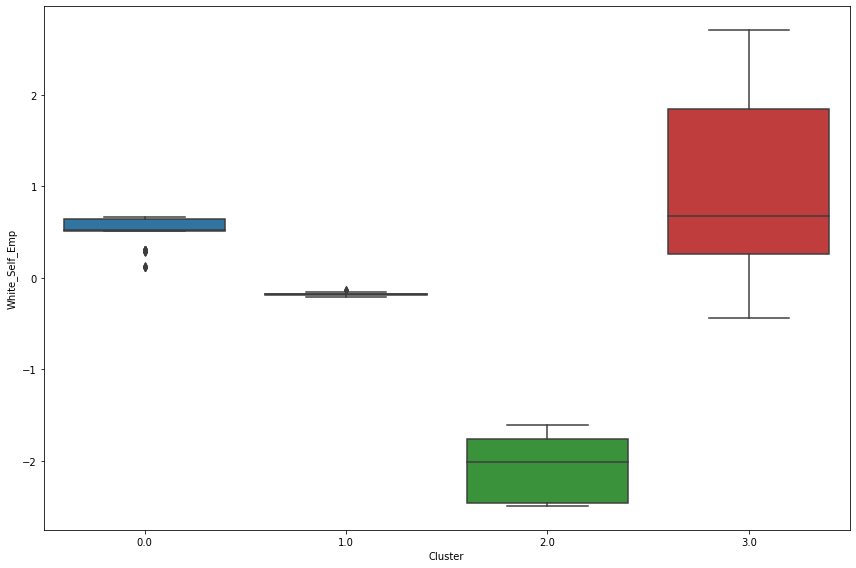

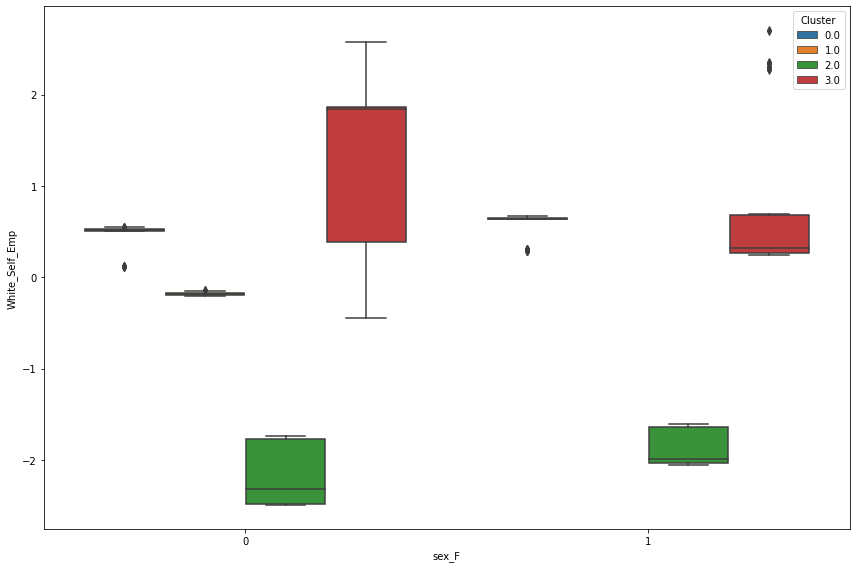

In [46]:
########################
# PCA 3
########################

# Follower 
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Cluster',
            y = 'White_Self_Emp',
#            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

########################
# PCA 3
########################

# Follower 
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'sex_F',
            y = 'White_Self_Emp',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

PCA 3- The box plots show cluster 0 and 3 is positive and related to the white self employee. The cluster 1  is neutral and cluster 2 is negative related to the white self employee. 


Red- old unmarried women and entrepreneurs less than the old unmarried men and entrepreneurs.

Green- is not white and old unmarried women less than men.



Cluster 0 is young single women and self employed.
Cluster 1 is men in relationship.
Cluster 2 is not white and old unmarried.
Cluster 3 is middle age white unmarried entrepreneurs.


**New model** Logistic Regression

In [47]:
# Adding some original variables

# concatenating demographic information with pca-clusters
final_pca_clust_df_2 = pd.concat([model_df.loc[ :, ['times_bought',
                                                    'quantity_bought',
                                                    'money_spent',
                                                    'type_of_client'
                                                   ]],
                                  final_pca_clust_df],
                                  axis = 1)

# renaming columns
final_pca_clust_df_2.columns = ['times_bought',
                                'quantity_bought',
                                'money_spent',
                                'type_of_client',
                                'age','sex_F',
                                 'race_White','employment_type_Self-emp-not-inc',
                                 'marital_status_Married-civ-spouse',
                                 'relationship_in_household_Husband',
                                 'relationship_in_household_Unmarried',
                                 'Cluster','Single_Women',  
                                 'Old_Unmarried',  
                                 'White_Self_Emp']



In [48]:
# rescaling dataframe


final_pca_clust_df_2_scaled = scaler(df = final_pca_clust_df_2)


# checking pre- and post-scaling variance
print(np.var(final_pca_clust_df_2), '\n\n')
print(np.var(final_pca_clust_df_2_scaled))


times_bought                           2.761642e+04
quantity_bought                        3.425586e+07
money_spent                            4.506953e+07
type_of_client                         1.452169e-01
age                                    1.791389e+02
sex_F                                  2.173456e-01
race_White                             1.273971e-01
employment_type_Self-emp-not-inc       6.046385e-02
marital_status_Married-civ-spouse      2.488582e-01
relationship_in_household_Husband      2.423159e-01
relationship_in_household_Unmarried    9.842667e-02
Cluster                                1.178267e+00
Single_Women                           2.640946e+00
Old_Unmarried                          1.170489e+00
White_Self_Emp                         1.014180e+00
dtype: float64 


times_bought                           1.0
quantity_bought                        1.0
money_spent                            1.0
type_of_client                         1.0
age                           

In [ ]:
#renaming Type of client
#final_pca_clust_df_2['type_of_client'] = final_pca_clust_df_2['type_of_client'].map({1:'Wholesaller', 0:'Personal'})

# Log transformation
final_pca_clust_df_2['quantity_bought'] = np.log(final_pca_clust_df_2['quantity_bought'])
final_pca_clust_df_2['money_spent'] = np.log(final_pca_clust_df_2['money_spent'])
final_pca_clust_df_2['times_bought'] = np.log(final_pca_clust_df_2['times_bought'])

# filling missing values with the mean
mean   = final_pca_clust_df_2['money_spent'].mean()
final_pca_clust_df_2['money_spent'].fillna(value = mean,
                         inplace = True)



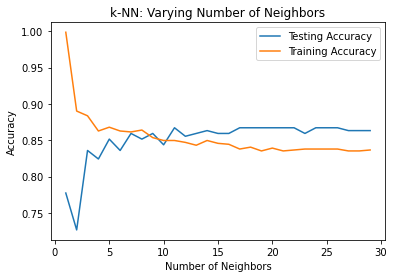

In [52]:
# Create arrays for the features and the response variable
y = np.array(final_pca_clust_df_2.loc[:,'type_of_client'])
x = np.array(final_pca_clust_df_2.drop('type_of_client', axis=1))
indices = np.arange(len(y))
x_train, x_test, y_train, y_test,x_in,y_in = train_test_split(x, y,indices, test_size = 0.25, 
                                                              random_state=219, stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [53]:
# Create a k-NN classifier with 8 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(x_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(x_test)

# Saving the score and gap for the train and test dataset into variables
knn_train_score = knn.score(x_train, y_train).round(decimals=4)
knn_test_score = knn.score(x_test, y_test).round(decimals=4)
knn_gap_score = abs(knn.score(x_train, y_train) - knn.score(x_test, y_test)).round(4)
# Printing the score and gap for the train and test dataset
print("knn Training Score:",knn.score(x_train, y_train).round(decimals=4))
print("knn Testing Score:",knn.score(x_test, y_test).round(decimals=4))
print('Knn Train-Test Gap :', abs(knn.score(x_train, y_train) - knn.score(x_test, y_test)).round(4))

knn Training Score: 0.8536
knn Testing Score: 0.8594
Knn Train-Test Gap : 0.0058


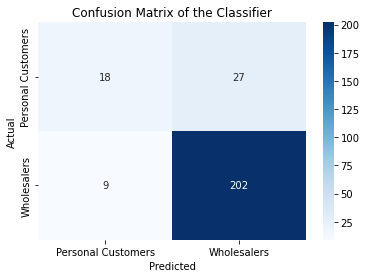

In [54]:
# calling the visual_cm function
y_test_knn = y_test
y_pred_knn = y_pred
visual_cm(true_y = y_test_knn,
          pred_y = y_pred_knn,
          labels = ['Personal Customers', 'Wholesalers'])

In [55]:
## printing the confusion matrix and the classification report 
knn_cm = confusion_matrix(y_test,y_pred)
knn_cr = classification_report(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 18  27]
 [  9 202]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        45
           1       0.88      0.96      0.92       211

    accuracy                           0.86       256
   macro avg       0.77      0.68      0.71       256
weighted avg       0.84      0.86      0.84       256



### Final Recommendations

+ So finally, among 2992 customers for the prediction - the model predicts 2584 as wholesalers and 408 as personal customers.

+ That counts to 86.36% of customers are wholesalers and 13.63% are personal customers.

+ For this problem, As promised the  main concern was classifying wholesalers is seems to be considerable solved, as Flora is launching a new marketing campaign and their focus was getting to wholesalers without unnecessarily spamming the regular customers, as they are not the target, and they could have bad consequences if they are receiving a promotions and other benefits.

+ We managed to improve the model, so it predicts wholesalers properly in 86% of the cases which is a good improvement and still there are 14% that might receive the notifications but can be avoided with the further second level actions.

+ For such cases we strongly recommend to use unsupervised learning methodology of Machine Learning like  
  Clustering - Principal Component Analysis and K-Means.